In [27]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv("/Users/ranja/Downloads/diabetes.csv")

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
#Features Explanation

#Pregnancies: Number of previous pregnancies
#Glucose: Plasma glucose concentration
#BloodPressure: Diastolic blood pressure
#SkinThickess: Skin fold thickness measured from the triceps
#Insulin: Blood serum insulin concentration
#BMI: Body Mass Index
#DiabetesPedigreeFunction: A summarized score that indicates the genetic predisposition of the patient for diabetes, as extrapolated from the patient's family record for diabetes
#Age: Age in years
#Outcome: The target variable we are trying to predict , 1 for patients that developed diabetes within 5 years of the initial measurement and 0 otherwise

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

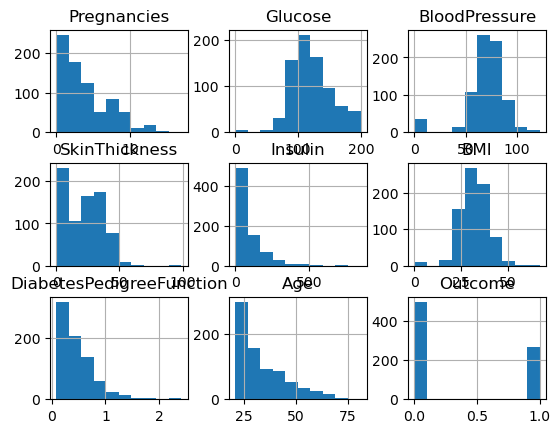

In [31]:
df.hist()

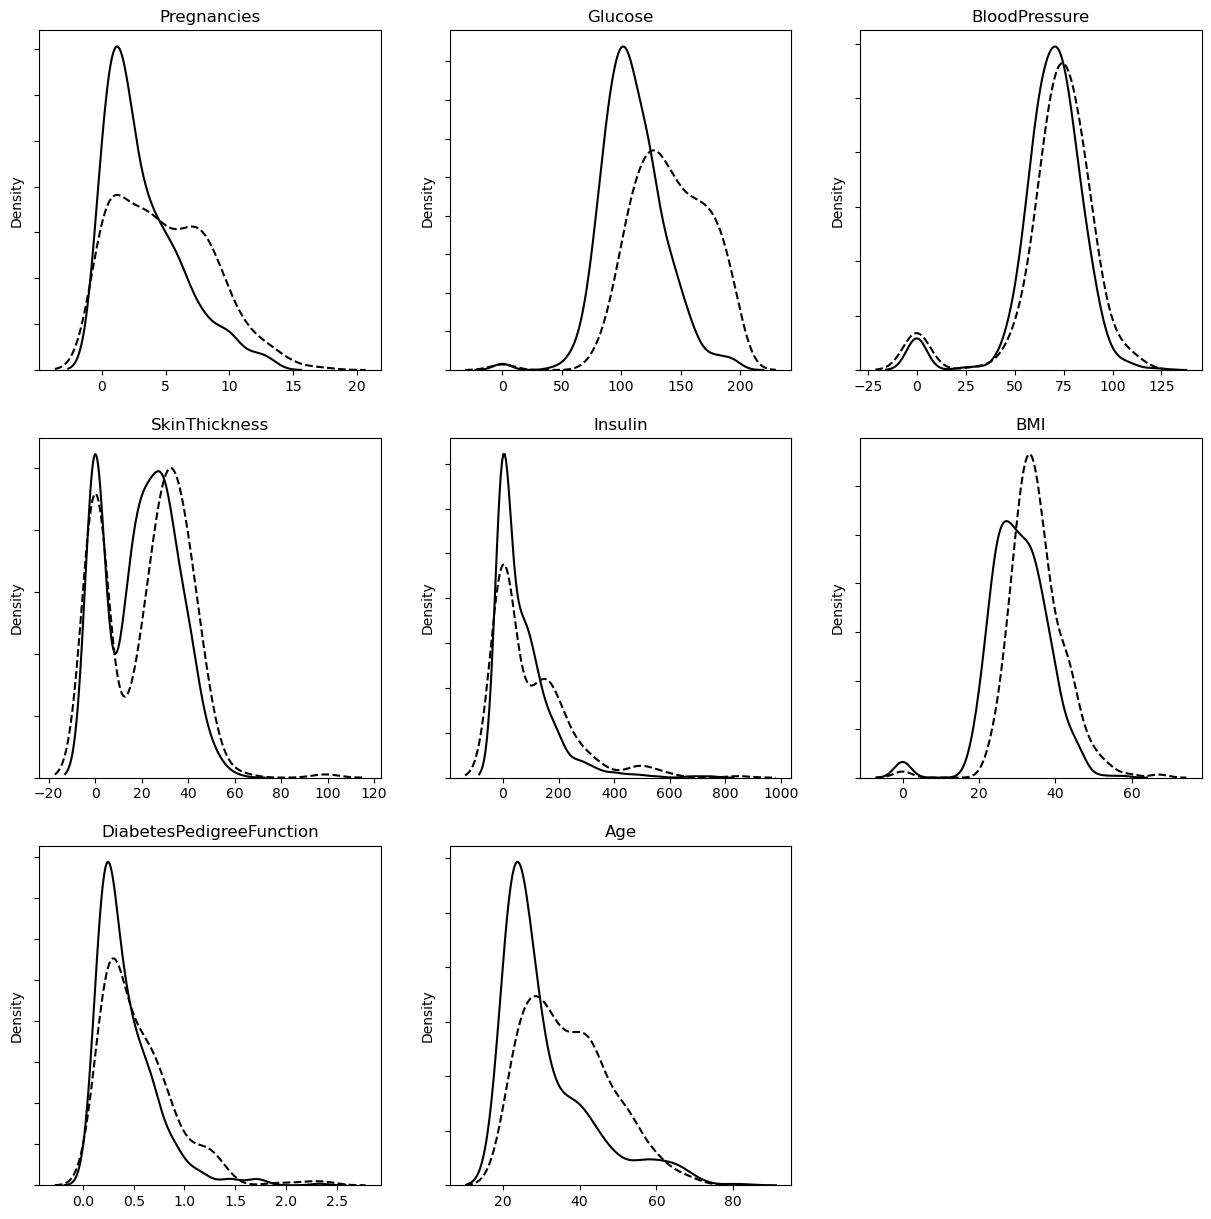

In [32]:
import seaborn as sns
# create a subplot of 3x3
plt.subplots(3,3,figsize=(15,15))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, kde_kws={'linestyle':'--', 'color':'black', 'label':"Diabetes"})
    ax.set_title(col)
    
#Hide the 9th subplot (bottom right since there are only 8 plots)
plt.subplot(3,3,9).set_visible(False)

plt.show()

In [33]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]

  print(col + ": "+str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [36]:
#Replace 0 value with NaN
import numpy as np
df['Glucose'] = df['Glucose'].replace(0,np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)
df['Insulin'] = df['Insulin'].replace(0,np.nan)

df['BMI'] = df['BMI'].replace(0,np.nan)

In [37]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]

  print(col + ": "+str(missing_rows))


Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [38]:
# Replace Nan values with the mean of the non-missing values by using fillna()
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [39]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

df.describe().loc[['mean','std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


In [40]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
# Split the data into training set(80%) and the testing set(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Make a second split to create the final training set and the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2)

In [41]:
from keras.models import Sequential
model = Sequential()

In [42]:
from keras.layers import Dense # Add the first Hidden layer
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))# Add the second hidden layer
model.add(Dense(1, activation='sigmoid'))

In [43]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
#Train the model for 200 epochs
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 2ms/step - loss: 0.6722 - accuracy: 0.6151
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.7026
Epoch 3/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5964 - accuracy: 0.7210
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.7271
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7352
Epoch 6/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.7556
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7597
Epoch 8/200
16/16 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.7597
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7699
Epoch 10/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7678
Epoch 11/

In [45]:
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9145
Training Accuracy: 91.45%

5/5 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.7532
Testing Accuracy: 75.32%



5/5 [==============================] - 0s 1ms/step


Text(50.72222222222221, 0.5, 'Actual')

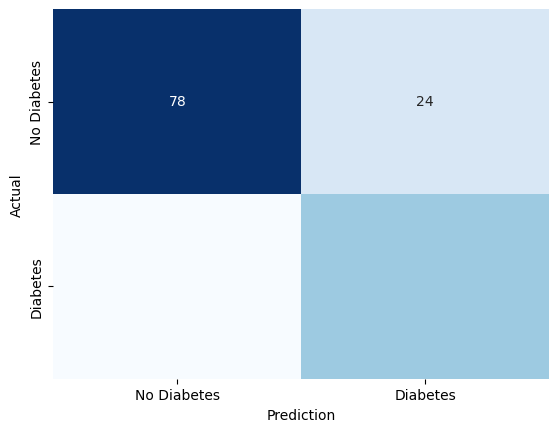

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
c_matrix = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'], cbar= False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [47]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(X_test)
FPR,TPR, _= roc_curve(y_test,y_test_pred_probs)

5/5 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True Positive Rate')

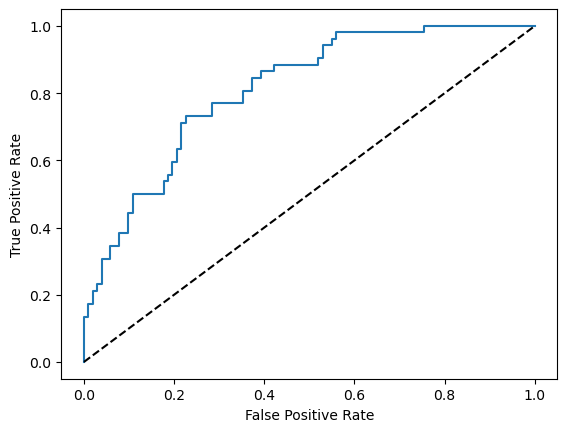

In [48]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--',color='black')#diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')